# Solución Laboratorio Aprendizaje No Supervizado

In [223]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import pairwise_distances,silhouette_score
import numpy as np
from sklearn_extra.cluster import KMedoids

In [224]:
dataset = sm.datasets.get_rdataset("USArrests", "datasets")

In [225]:
df_usa_arrests=dataset.data

### 1.Realice una pequeña descripción estadística de las variables. ¿se justifica o no una estandarizacion de las variables cuantitativas?.

## Anáslisis Descriptivo

In [226]:
df_usa_arrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [227]:
df_usa_arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [228]:

df_usa_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [229]:
df_usa_arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [230]:
df_usa_arrests.shape

(50, 4)

In [231]:
df_usa_arrests.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [232]:
df_usa_arrests.duplicated().sum()

0

In [233]:
df_usa_arrests.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Análisis Multivariado

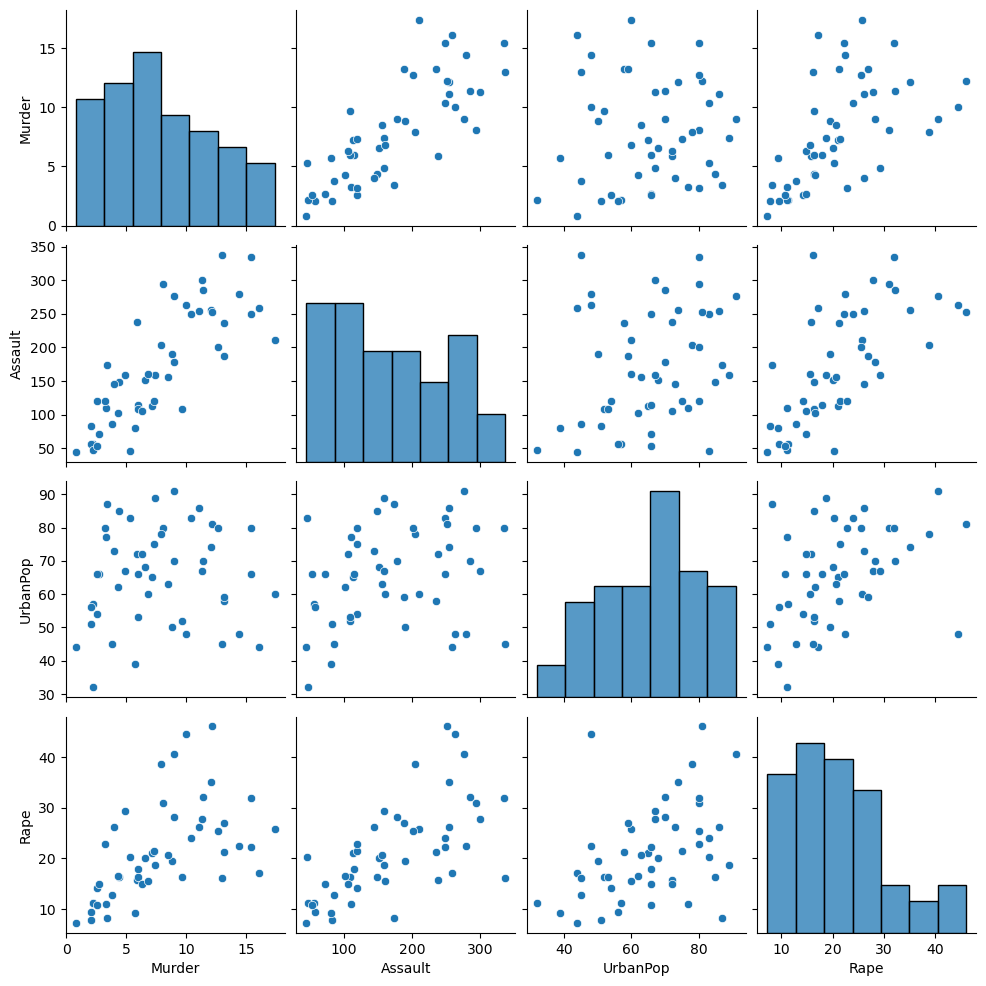

In [234]:
sns.pairplot(df_usa_arrests)
plt.show()

<Axes: >

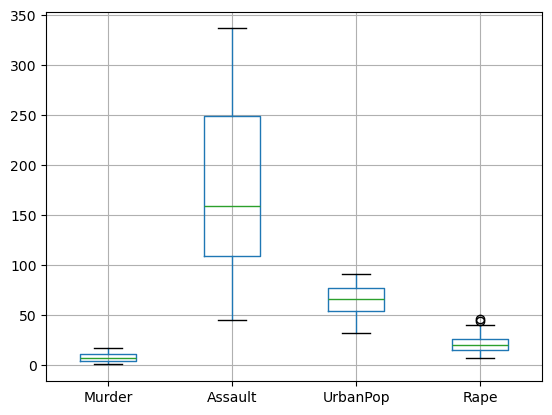

In [235]:
df_usa_arrests.boxplot()

Ahora escalamos los datos

In [236]:

df_usa_arrests_scaled=pd.DataFrame(scale(df_usa_arrests),columns=df_usa_arrests.columns)

<Axes: >

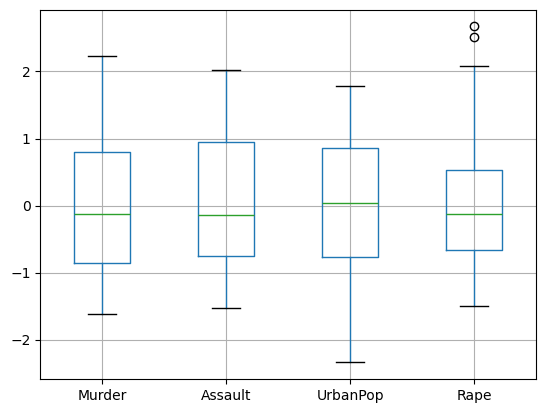

In [237]:
df_usa_arrests_scaled.boxplot()

### 2.A. Agrupar los observaciones mediante enlace simple, completo y ward, junto con las métricas Euclidiana y Manhattan. Visualice los agrupamiento mediante sus respectivos dendrograma.

Enlace simple con distancia Euclidiana

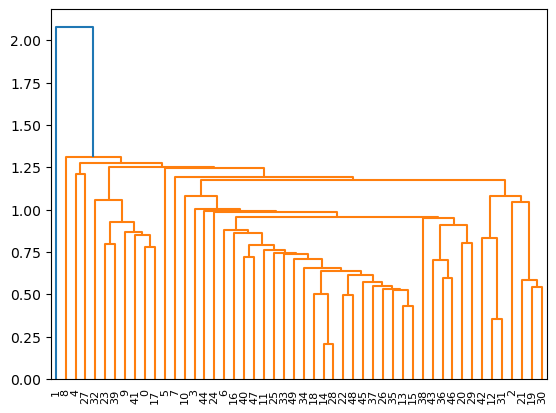

In [239]:
linkage_matrix = linkage(df_usa_arrests_scaled, method='single',metric='euclidean')
dendrogram(linkage_matrix)
plt.show()


Enlace simple con distancia Manhattan

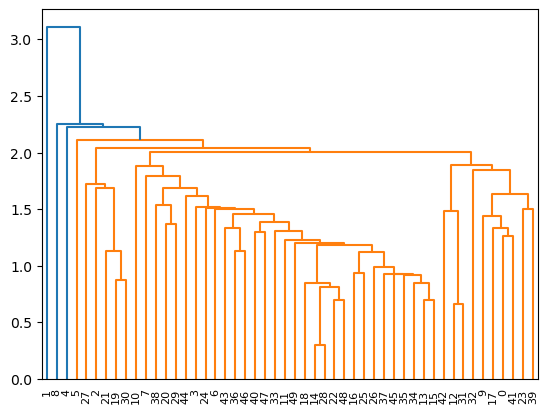

In [240]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="single",metric="cityblock")
dendrogram(linkage_matrix)
plt.show()

Enlace completo con distancia Euclidiana

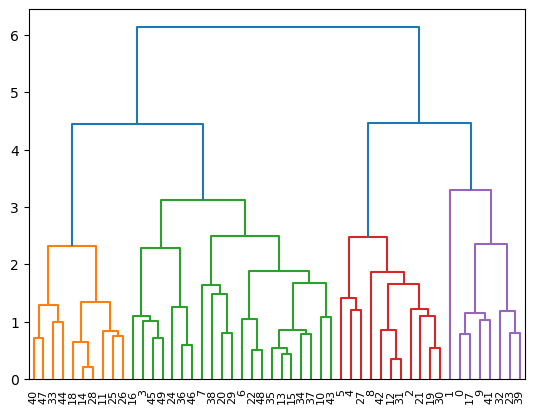

In [241]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete",metric="euclidean")
dendrogram(linkage_matrix)
plt.show()

Enlace completo con distancia Manhattan

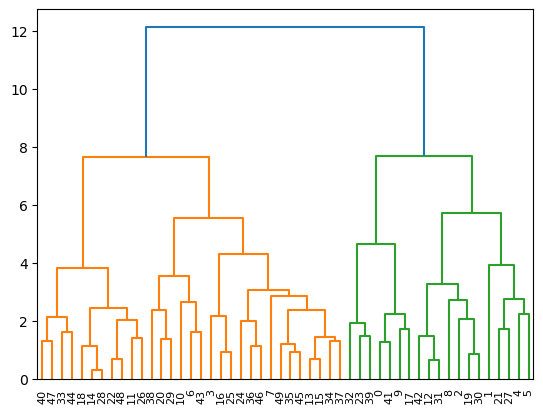

In [242]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete", metric="cityblock")
dendrogram(linkage_matrix)
plt.show()

Enlace Ward con distancia Euclidiana

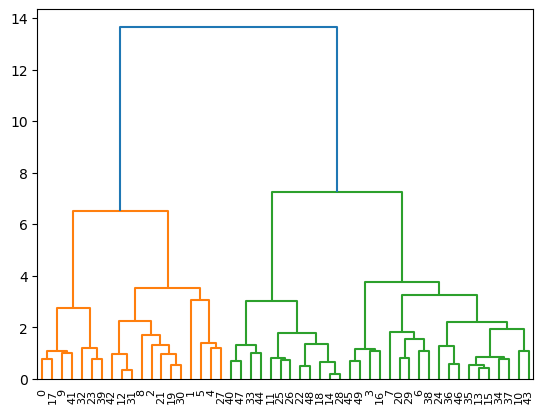

In [243]:
linkage_matrix = linkage(df_usa_arrests_scaled, method="ward",metric="euclidean")
dendrogram(linkage_matrix)
plt.show()

### 2.B. Escoja uno de los métodos aglomerativos (métrica y enlace), con este, crear los 3 grupos y comparar los clúster obtenidos, en términos de promedio y desviación estándar.

Usaremos el enlace ward con la métrica euclideana

In [244]:
model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")

labels = model.fit_predict(df_usa_arrests_scaled)
print(f'Etiquetas: {labels}')

print('Cluster 01: ',df_usa_arrests_scaled[labels == 0])
print('Cluster 02: ',df_usa_arrests_scaled[labels == 1])
print('Cluster 03: ',df_usa_arrests_scaled[labels == 2])

Etiquetas: [0 0 0 1 0 0 1 1 0 0 1 2 0 1 2 1 1 0 2 0 1 0 2 0 1 2 2 0 2 1 0 0 0 2 1 1 1
 1 1 0 2 0 0 1 2 1 1 2 2 1]
Cluster 01:        Murder   Assault  UrbanPop      Rape
0   1.255179  0.790787 -0.526195 -0.003451
1   0.513019  1.118060 -1.224067  2.509424
2   0.072361  1.493817  1.009122  1.053466
4   0.281093  1.275635  1.776781  2.088814
5   0.025976  0.402909  0.869548  1.883901
8   1.765415  1.990786  1.009122  1.150530
9   2.229265  0.487757 -0.386621  0.492653
12  0.605789  0.948363  1.218484  0.298525
17  1.765415  0.948363  0.032102  0.104398
19  0.814521  1.566544  0.101889  0.708350
21  1.000062  1.021090  0.590399  1.495646
23  1.927762  1.069575 -1.503215 -0.445631
27  1.023254  0.984726  1.078909  2.671197
30  0.837714  1.384726  0.311251  1.172100
31  0.768136  1.008969  1.427845  0.525008
32  1.208794  2.015028 -1.433428 -0.553480
39  1.533490  1.311999 -1.224067  0.136752
41  1.255179  0.208970 -0.456408  0.611287
42  1.139217  0.366545  1.009122  0.460298
Cluster 02:  

In [245]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [246]:
def compare_promedios_std(df):
    clusters_index = df["cluster"].unique()
    for i in clusters_index:
        print(f'CLUSTER {i+1}')
        print('----')
        print('Promedio: ')
        print(df[df["cluster"] == i].mean())
        print('Desviación Estándar: ')
        print(df[df["cluster"] == i].std())

In [247]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 1
----
Promedio: 
Murder      1.053771
Assault     1.073403
UrbanPop    0.193714
Rape        0.861041
cluster     0.000000
dtype: float64
Desviación Estándar: 
Murder      0.614641
Assault     0.500570
UrbanPop    1.036692
Rape        0.928914
cluster     0.000000
dtype: float64
CLUSTER 2
----
Promedio: 
Murder     -0.365856
Assault    -0.347968
UrbanPop    0.399403
Rape       -0.220851
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.464745
Assault     0.497125
UrbanPop    0.759453
Rape        0.570458
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder     -1.089198
Assault    -1.148605
UrbanPop   -0.939102
Rape       -1.013634
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.361124
Assault     0.304152
UrbanPop    0.735228
Rape        0.339504
cluster     0.000000
dtype: float64


### 2.C. Realice un agrupamiento considerando 3 grupos utilizando la tecnica K-medias. Comparar los cluster obtenidos, en terminos de promedio y desviacion estandar

In [248]:
model = KMeans(n_clusters=3)
model.fit(df_usa_arrests_scaled)
labels = model.predict(df_usa_arrests_scaled)


In [251]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [252]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 1
----
Promedio: 
Murder      0.977973
Assault     0.986458
UrbanPop    0.138444
Rape        0.805928
cluster     0.000000
dtype: float64
Desviación Estándar: 
Murder      0.630371
Assault     0.549042
UrbanPop    1.022952
Rape        0.910440
cluster     0.000000
dtype: float64
CLUSTER 2
----
Promedio: 
Murder     -0.494407
Assault    -0.386484
UrbanPop    0.581676
Rape       -0.264310
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.382029
Assault     0.499101
UrbanPop    0.623610
Rape        0.564743
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder     -0.971303
Assault    -1.117836
UrbanPop   -0.939550
Rape       -0.976578
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.547936
Assault     0.311620
UrbanPop    0.703929
Rape        0.351438
cluster     0.000000
dtype: float64


### 3. Utilice las tecnicas del codo, de Hartigan y Silhuette para seleccionar la cantidad optima de grupos utilizando algun metodo de agrupamiento jerarquico (deben fijar una metrica y un tipo de enlace). En caso que los algoritmos entreguen diferentes valores de K seleccionar una metodologıa e interpretar los grupos obtenidos.

In [253]:
def obtener_within_cluster(observaciones, labels):
    distancias_totales_cluster = []
    for index_cluster in range(0, max(labels) + 1):
        distancias_por_cluster = pairwise_distances(
            X=observaciones[labels == index_cluster], metric="euclidean"
        )
        distancias_totales_cluster.append(distancias_por_cluster.sum())
    return sum(distancias_totales_cluster)

Usaremos el tipo de enlace ward con una métrica euclidiana

Técnica del codo

Text(0, 0.5, 'Porcentaje Within-Cluster')

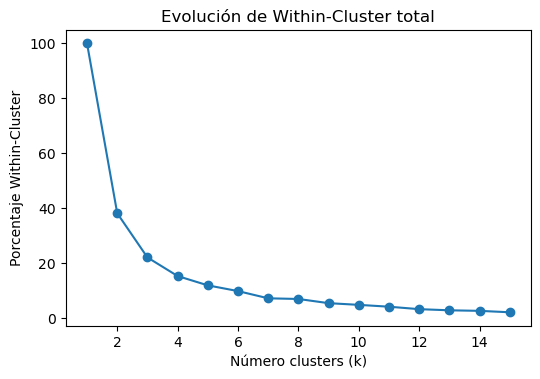

In [254]:
k_max =15
within_cluster_list = []
range_ks = range(1, k_max + 1)
for k in range_ks:
    model = AgglomerativeClustering(
        n_clusters=k, metric="euclidean", linkage="ward"
    )
    labels = model.fit_predict(df_usa_arrests_scaled)
    within_cluster_list.append(obtener_within_cluster(df_usa_arrests_scaled, labels))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_ks, within_cluster_list / within_cluster_list[0] * 100, marker="o")
ax.set_title("Evolución de Within-Cluster total")
ax.set_xlabel("Número clusters (k)")
ax.set_ylabel("Porcentaje Within-Cluster")

Técnica de Hartigan

[0.03244594 0.01491121 0.00926043 0.00608724 0.00464517 0.00818721
 0.00079675 0.00659591 0.00309636 0.00402638 0.00700807 0.00384677
 0.0020617 ]


Text(0, 0.5, 'H')

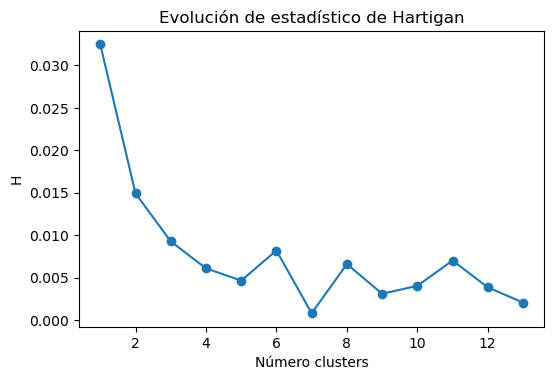

In [255]:
k=np.arange(15)
# Método Hartigan
wc_array = np.array(within_cluster_list)
H = (wc_array[0:13] / wc_array[1:14] - 1) / (len(df_usa_arrests_scaled) - k[0:13])
print(H)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker="o")
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel("Número clusters")
ax.set_ylabel("H")

Técnica de Silhuette

Text(0, 0.5, 'Media índices silhouette')

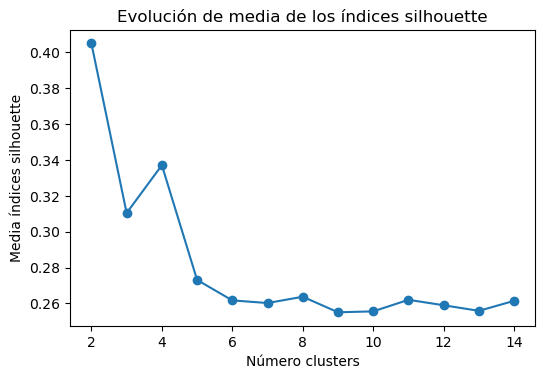

In [256]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for k in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward")
    labels = model.fit_predict(df_usa_arrests_scaled)
    silhouette_avg = silhouette_score(df_usa_arrests_scaled, labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker="o")
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Media índices silhouette")

### 4. Utilice las tecnicas del codo, de Hartigan y Silhuette para seleccionar la cantidad  ́optima de grupos utilizando el algoritmo K-medias. En caso que los algoritmos entreguen diferentes valores de K, seleccionar una metodologia e interpretar los grupos obtenidos.

Técnica del codo

Text(0, 0.5, 'Porcentaje Within-Cluster')

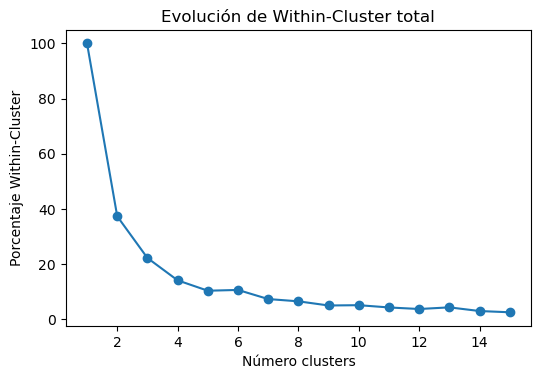

In [257]:
k_max = 15
within_cluster_list = []

for k in range(1, k_max + 1):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(df_usa_arrests_scaled)
    within_cluster_list.append(obtener_within_cluster(df_usa_arrests_scaled, labels))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(
    range(1, k_max + 1), within_cluster_list / within_cluster_list[0] * 100, marker="o"
)
ax.set_title("Evolución de Within-Cluster total")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Porcentaje Within-Cluster")

Técnica de Hartigan

[ 0.0336983   0.01396463  0.01208299  0.00784382 -0.00058401  0.01020862
  0.00294729  0.00722044 -0.00051963  0.00483555  0.00392909 -0.00366599
  0.01230494]


Text(0, 0.5, 'H')

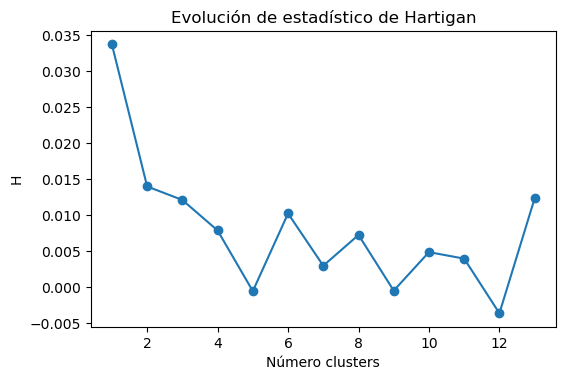

In [258]:
k = np.arange(15)
wc_array = np.array(within_cluster_list)
H = (wc_array[0:13] / wc_array[1:14] - 1) / (len(df_usa_arrests_scaled) - k[0:13])
print(H)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker="o")
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel("Número clusters")
ax.set_ylabel("H")

Técnica de Silhuette

Text(0, 0.5, 'Media índices silhouette')

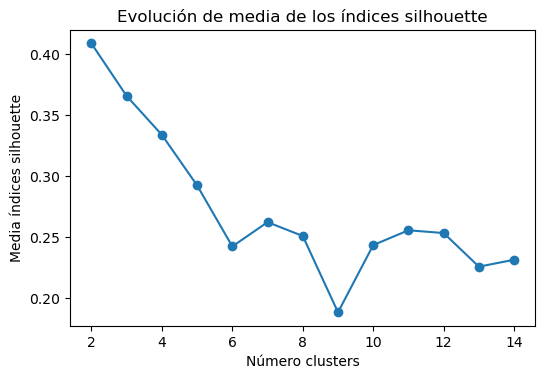

In [259]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for k in range_n_clusters:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(df_usa_arrests_scaled)
    silhouette_avg = silhouette_score(df_usa_arrests_scaled, labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker="o")
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Media índices silhouette")

### 5. Buscar o implementar la tecnica de agrupamiento K-medois (PAM) y el metodo del Gap-Statistic para seleccionar la cantidad de grupos

Usaremos esta función para generar las muestras aleatorias

In [260]:
def generate_samples(limites,n):
    n_features = len(limites[0])
    samples = np.zeros((n, n_features))
    for i in range(n_features):
        samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
    return samples

/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

Número de clusters: 1
Número de clusters: 2
 GAPS COMPARACIÓN: 0.15443054916776688>=0.4062195749236495
Número de clusters: 3
 GAPS COMPARACIÓN: 0.4583623652181119>=0.532441082414042
Número de clusters: 4
 GAPS COMPARACIÓN: 0.5616810684300484>=0.6517084051862994
Número de clusters: 5
 GAPS COMPARACIÓN: 0.688854612803782>=0.7454629338212371
Número de clusters: 6
 GAPS COMPARACIÓN: 0.7828753857921802>=0.7916803001710587
Número de clusters: 7
 GAPS COMPARACIÓN: 0.8186005165470203>=0.7950725068459985
 Cluster óptimo:  6
Número de clusters: 8
 GAPS COMPARACIÓN: 0.828291159703956>=0.8575421068115988
Número de clusters: 9
 GAPS COMPARACIÓN: 0.8952515651275048>=0.8852692690673101
 Cluster óptimo:  8
Número de clusters: 10
 GAPS COMPARACIÓN: 0.919432970303637>=0.9035328742356352
 Cluster óptimo:  9


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de clusters: 11
 GAPS COMPARACIÓN: 0.9558933274542154>=0.965744878142339
Número de clusters: 12
 GAPS COMPARACIÓN: 1.0173286336259615>=0.9548126787608694
 Cluster óptimo:  11
Número de clusters: 13
 GAPS COMPARACIÓN: 0.9885389661464821>=1.0281797502106031
Número de clusters: 14
 GAPS COMPARACIÓN: 1.0681179212028509>=1.0602499183513963
 Cluster óptimo:  13


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de clusters: 15
 GAPS COMPARACIÓN: 1.0999246062309034>=1.040529929099585
 Cluster óptimo:  14


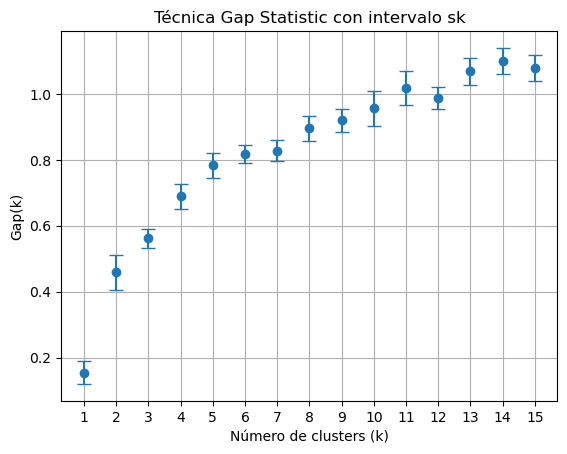

In [261]:
m_conjuntos=15
k_max=15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k=[]
gaps=[]
sks=[]
range_ks=range(1,k_max+1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="manhattan").fit(df_usa_arrests_scaled)
    labels = model.labels_
    wc_samples=[]
    for i in range(m_conjuntos):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="manhattan").fit(samples)
        labels_sample = model_sample.labels_
        within_cluster_sample=obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original=obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio=np.log(wc_samples).mean()
    gap_k=l_medio-np.log(within_cluster_original)
    sdk_cuadrado=((np.log(wc_samples)-l_medio)**2).mean()
    sk=np.sqrt(1+1/m_conjuntos)*np.sqrt(sdk_cuadrado)
    wc_por_k.append(within_cluster_original)
    gaps.append(gap_k)
    sks.append(sk)
    print(f'Número de clusters: {k}')
    if k>1:
        print(f' GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}')
        if gaps[k-2]>=gap_k-sk:
            print(' Cluster óptimo: ',k-1)
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Técnica Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

Según la gráfica el k menor que cumple la condición es k=6

### 6. Utilizar el método Gap-Statistic para escoger la cantidad apropiada de Clúster cuando se aplica la técnica de agrupamiento K-medois (PAM). Utilice al menos dos metricas de disimilaridad diferentes. En caso que los métodos anteriores den resultados diferentes escoger uno y luego describir los grupos (promedio y desviación estándar de cada variable de cada grupo) seleccionados mediante PAM

Métrica Euclidiana

/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

Número de cluster: 1
Número de cluster: 2
 GAPS COMPARACIÓN: 0.15527926980915296>=0.4368387027502499
Número de cluster: 3
 GAPS COMPARACIÓN: 0.46759147708676263>=0.531786629694886
Número de cluster: 4
 GAPS COMPARACIÓN: 0.558306284567931>=0.663031672792154
Número de cluster: 5
 GAPS COMPARACIÓN: 0.7002557096984106>=0.7575383864583717
Número de cluster: 6
 GAPS COMPARACIÓN: 0.7878260591492596>=0.8294200350234135
Número de cluster: 7
 GAPS COMPARACIÓN: 0.8558804608761035>=0.8071433845333629
Número de clusters óptimo: 6
Número de cluster: 8
 GAPS COMPARACIÓN: 0.8467625714261491>=0.83222112648842
Número de clusters óptimo: 7
Número de cluster: 9
 GAPS COMPARACIÓN: 0.8691191461675292>=0.888253518012528


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de cluster: 10
 GAPS COMPARACIÓN: 0.9272341521128515>=0.9196262417465411
Número de clusters óptimo: 9
Número de cluster: 11
 GAPS COMPARACIÓN: 0.9616144619383435>=0.9131654022098543
Número de clusters óptimo: 10
Número de cluster: 12
 GAPS COMPARACIÓN: 0.9863517105080009>=1.0161694390171936
Número de cluster: 13
 GAPS COMPARACIÓN: 1.0571755939419516>=1.0432592315988916
Número de clusters óptimo: 12
Número de cluster: 14
 GAPS COMPARACIÓN: 1.0808182995659452>=1.0610111828698745
Número de clusters óptimo: 13
Número de cluster: 15
 GAPS COMPARACIÓN: 1.112051956029278>=1.0748586984872919
Número de clusters óptimo: 14


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

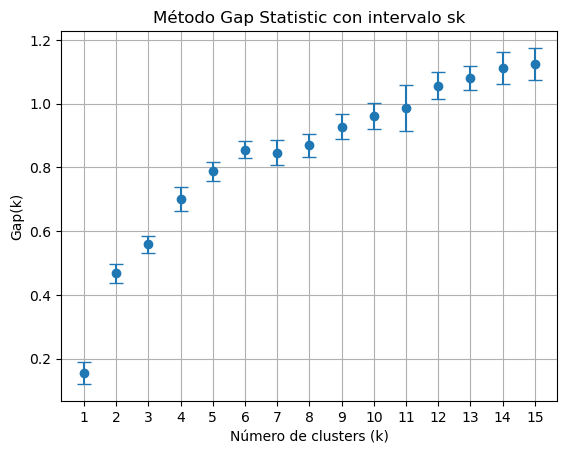

In [262]:
m_conjuntos = 15
k_max = 15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k = []
gaps = []
sks = []
range_ks = range(1, k_max + 1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="euclidean").fit(
        df_usa_arrests_scaled
    )
    labels = model.labels_
    wc_samples = []
    for i in range(m_conjuntos):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="euclidean").fit(
            samples
        )
        labels_sample = model_sample.labels_
        within_cluster_sample = obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original = obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio = np.log(wc_samples).mean()
    gap_k = l_medio - np.log(within_cluster_original)
    sdk_cuadrado = ((np.log(wc_samples) - l_medio) ** 2).mean()
    sk = np.sqrt(1 + 1 / m_conjuntos) * np.sqrt(sdk_cuadrado)
    gaps.append(gap_k)
    sks.append(sk)
    wc_por_k.append(within_cluster_original)
    print(f"Número de cluster: {k}")
    if k > 1:
        print(f" GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}")
        if gaps[k - 2] >= gap_k - sk:
            print(f"Número de clusters óptimo: {k-1}")
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Método Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

Métrica chebyshev

/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

Número de clusters: 1
Número de clusters: 2
 GAPS COMPARACIÓN: 0.14671518854555643>=0.41778538897619055
Número de clusters: 3
 GAPS COMPARACIÓN: 0.45605052467717044>=0.49692132699416
Número de clusters: 4
 GAPS COMPARACIÓN: 0.5455083375015599>=0.6682666296535655
Número de clusters: 5
 GAPS COMPARACIÓN: 0.7069827655812873>=0.7360140249444241
Número de clusters: 6
 GAPS COMPARACIÓN: 0.7797506898610065>=0.7660347614393083
Número de clusters óptimo: 5
Número de clusters: 7
 GAPS COMPARACIÓN: 0.8006636858983152>=0.8135893526100342
Número de clusters: 8
 GAPS COMPARACIÓN: 0.8531517998947837>=0.8515378242139187
Número de clusters óptimo: 7
Número de clusters: 9
 GAPS COMPARACIÓN: 0.8896475527939973>=0.8698011752476766
Número de clusters óptimo: 8
Número de clusters: 10
 GAPS COMPARACIÓN: 0.9002671607569566>=0.8887464397886014
Número de clusters óptimo: 9


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de clusters: 11
 GAPS COMPARACIÓN: 0.9471755625281206>=0.9645765829004934
Número de clusters: 12
 GAPS COMPARACIÓN: 1.0058513987485842>=0.9890424176090319
Número de clusters óptimo: 11
Número de clusters: 13
 GAPS COMPARACIÓN: 1.02532394852817>=1.0439651900046123
Número de clusters: 14
 GAPS COMPARACIÓN: 1.0855380740651404>=1.0539687716454662
Número de clusters óptimo: 13
Número de clusters: 15
 GAPS COMPARACIÓN: 1.0949233512290615>=1.046445633861042
Número de clusters óptimo: 14


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

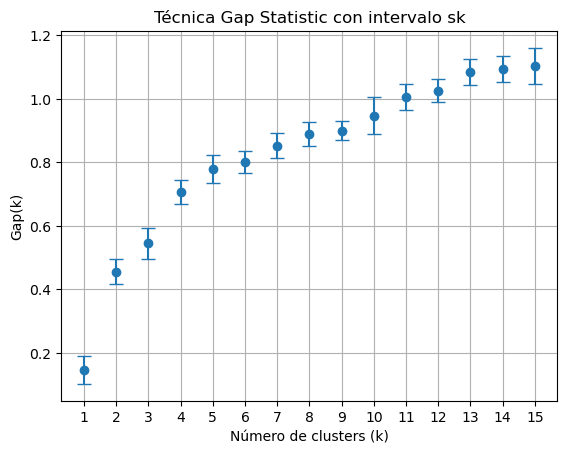

In [263]:
m_samples = 15
k_max = 15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k = []
gaps = []
sks = []
range_ks=range(1,k_max+1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="chebyshev").fit(
        df_usa_arrests_scaled
    )
    labels = model.labels_
    wc_samples = []
    for i in range(m_samples):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="chebyshev").fit(
            samples
        )
        labels_sample = model_sample.labels_
        within_cluster_sample = obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original = obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio = np.log(wc_samples).mean()
    gap_k = l_medio - np.log(within_cluster_original)
    gaps.append(gap_k)
    sdk_cuadrado = ((np.log(wc_samples) - l_medio) ** 2).mean()
    sk = np.sqrt(1 + 1 / m_samples) * np.sqrt(sdk_cuadrado)
    sks.append(sk)
    wc_por_k.append(within_cluster_original)
    print(f"Número de clusters: {k}")
    if k > 1:
        print(f" GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}")
        if gaps[k-2]>=gap_k-sk:
            print(f'Número de clusters óptimo: {k-1}')
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Técnica Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

En estos casos la primera métrica me dió como número óptimo de clusters k=6 y la segunda k=5, para continuar el análisis iremos por la primera métrica que nos dio k=6

In [265]:
model = KMedoids(n_clusters=6, method="pam", metric="euclidean").fit(
        df_usa_arrests_scaled
    )
labels = model.labels_
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [266]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 2
----
Promedio: 
Murder      1.426224
Assault     0.883211
UrbanPop   -0.822791
Rape        0.019467
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.603380
Assault     0.603072
UrbanPop    0.561714
Rape        0.411057
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder      0.782632
Assault     1.218059
UrbanPop    0.564229
Rape        1.709995
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.530747
Assault     0.465580
UrbanPop    0.886628
Rape        0.695733
cluster     0.000000
dtype: float64
CLUSTER 5
----
Promedio: 
Murder      0.573319
Assault     0.781090
UrbanPop    0.995165
Rape        0.617757
cluster     4.000000
dtype: float64
Desviación Estándar: 
Murder      0.417014
Assault     0.556877
UrbanPop    0.419884
Rape        0.292845
cluster     0.000000
dtype: float64
CLUSTER 6
----
Promedio: 
Murder     -0.716185
Assault    -0.345143
UrbanPop    1.138727
Rape       -0.542695
cluster     5.000000
dtype